# Digits dataset

In [93]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.8 MB/s eta 0:00:00a 0:00:01m


In [94]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


TensorFlow version: 2.15.0


#### check out for more layers: https://keras.io/api/layers/

In [6]:
digits = datasets.load_digits()

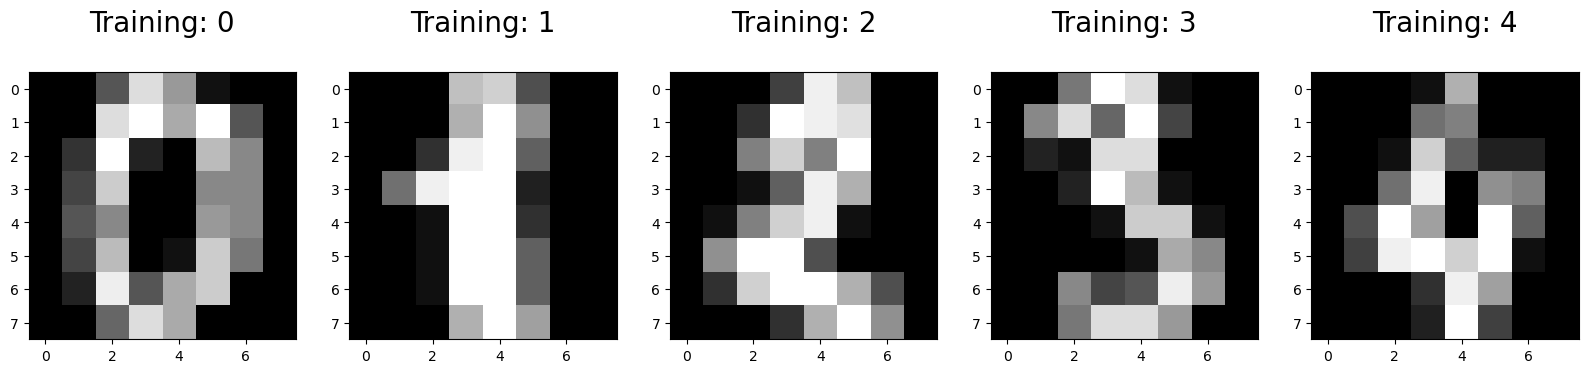

In [7]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [9]:
print(digits.data.shape)
print(digits.target.shape)
print(digits.target_names) # 10 classes -> 10 output neurons

(1797, 64)
(1797,)
[0 1 2 3 4 5 6 7 8 9]


In [14]:
# no flatting needed
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, shuffle=False
)

X_train = X_train.astype('float32') / 255.0 # Rescale pixel values to [0, 1]
X_test = X_test.astype('float32') / 255.0

# encode using keras.utils.to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [129]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Model

input_dim = X_train.shape[1]

#input_dim - number of features
input_layer = Input(shape=(input_dim,))
hidden_layer1 = Dense(64, activation='leaky_relu')(input_layer)
hidden_layer2 = Dense(32, activation='relu')(hidden_layer1)
hidden_layer3 = Dense(32, activation='relu')(hidden_layer2)
output_layer = Dense(10, activation='softmax')(hidden_layer3)

model = Model(inputs=input_layer, outputs=output_layer)

In [130]:
# see model architecture
model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 64)]              0         
                                                                 
 dense_54 (Dense)            (None, 64)                4160      
                                                                 
 dense_55 (Dense)            (None, 32)                2080      
                                                                 
 dense_56 (Dense)            (None, 10)                330       
                                                                 
Total params: 6570 (25.66 KB)
Trainable params: 6570 (25.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [131]:
# compile
# If you want to use "categorical_crossentropy", the labels should be one-hot-encoded. 
# When your labels are given as an integer, changing to "sparse_categorical_crossentropy" is required.

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [133]:
# Train 
history = model.fit(X_train, y_train, epochs=35, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/35
36/36 [==============================] - 0s 8ms/step - loss: 0.1659 - accuracy: 0.9643 - val_loss: 0.2699 - val_accuracy: 0.9271
Epoch 2/35
36/36 [==============================] - 0s 7ms/step - loss: 0.1563 - accuracy: 0.9626 - val_loss: 0.3000 - val_accuracy: 0.8993
Epoch 3/35
36/36 [==============================] - 0s 7ms/step - loss: 0.1509 - accuracy: 0.9678 - val_loss: 0.2719 - val_accuracy: 0.9132
Epoch 4/35
36/36 [==============================] - 0s 7ms/step - loss: 0.1441 - accuracy: 0.9687 - val_loss: 0.2570 - val_accuracy: 0.9167
Epoch 5/35
36/36 [==============================] - 0s 6ms/step - loss: 0.1376 - accuracy: 0.9695 - val_loss: 0.2569 - val_accuracy: 0.9167
Epoch 6/35
36/36 [==============================] - 0s 7ms/step - loss: 0.1321 - accuracy: 0.9704 - val_loss: 0.2754 - val_accuracy: 0.9097
Epoch 7/35
36/36 [==============================] - 0s 7ms/step - loss: 0.1314 - accuracy: 0.9687 - val_loss: 0.2519 - val_accuracy: 0.9167
Epoch 8/35
36/36 [==

In [134]:
# Ewaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

12/12 [==============================] - 0s 6ms/step - loss: 0.4784 - accuracy: 0.8833
Test Loss: 0.4783509075641632, Test Accuracy: 0.8833333253860474


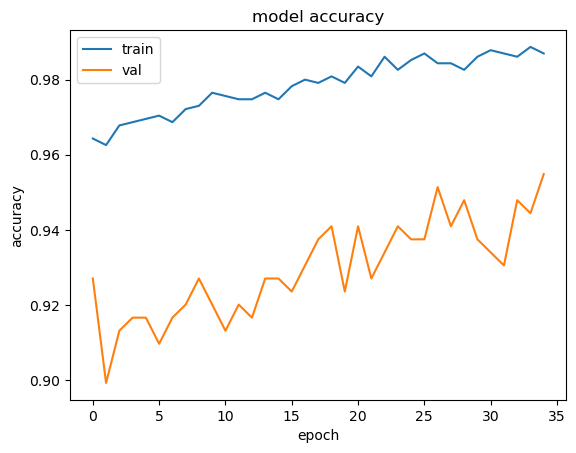

In [142]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

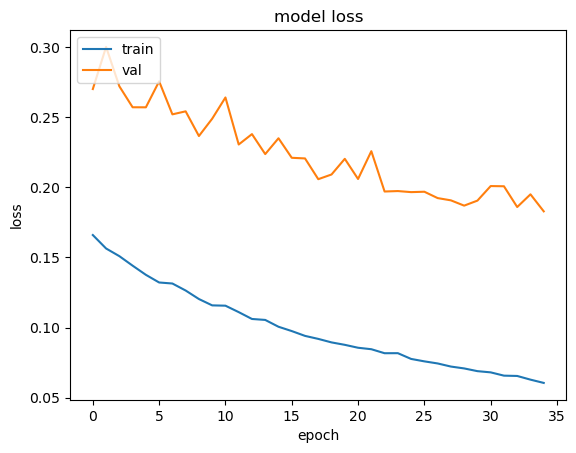

In [143]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [91]:
# Generate classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))

12/12 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      0.91      0.96        35
           1       0.81      0.69      0.75        36
           2       0.95      1.00      0.97        35
           3       0.96      0.73      0.83        37
           4       0.87      0.92      0.89        37
           5       0.84      0.97      0.90        37
           6       0.94      0.92      0.93        37
           7       0.92      0.94      0.93        36
           8       0.72      0.79      0.75        33
           9       0.76      0.84      0.79        37

    accuracy                           0.87       360
   macro avg       0.88      0.87      0.87       360
weighted avg       0.88      0.87      0.87       360



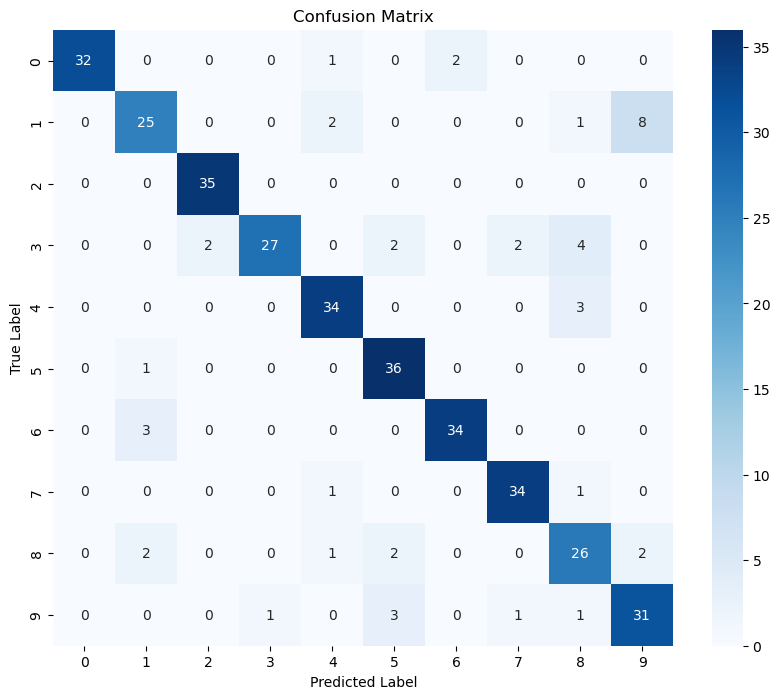

In [95]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()